# US HOUSEHOLD INCOME ANALYSIS

## Import required libraries and Load the data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
data = pd.read_csv('/content/Household Income Distribution by State.csv')
data.head(200)

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
data.shape

(6656, 5)

In [4]:
data.columns

Index(['Year', 'State', 'Income Level', 'Percent of Total',
       'Number of Households'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6656 entries, 0 to 6655
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  6656 non-null   int64  
 1   State                 6656 non-null   object 
 2   Income Level          6656 non-null   object 
 3   Percent of Total      6656 non-null   float64
 4   Number of Households  6656 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 260.1+ KB


## Exploratory Data Analysis

In [6]:
data.describe()

,Year,Percent of Total,Number of Households
count,6656.00000,6656.000000,6.656000e+03
mean,2012.50000,0.062500,1.401955e+05
std,2.29146,0.027318,1.664963e+05
min,2009.00000,0.006200,5.137000e+03
25%,2010.75000,0.044400,3.594950e+04
50%,2012.50000,0.055000,8.889250e+04
75%,2014.25000,0.075725,1.754052e+05
max,2016.00000,0.301800,1.586032e+06


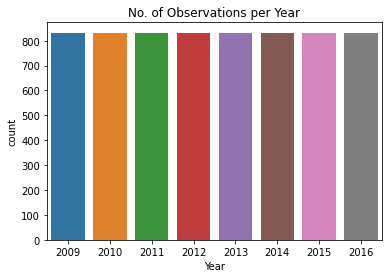

In [7]:
plt.title('No. of Observations per Year')
sns.countplot(data.Year);

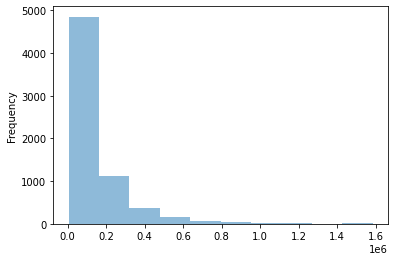

In [8]:
data['Number of Households'].plot.hist(alpha=0.5)

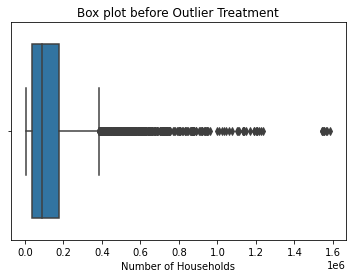

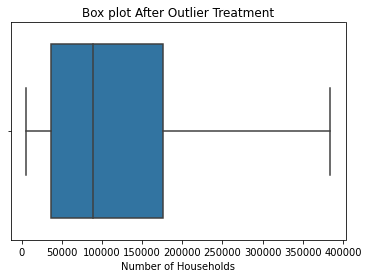

In [9]:
sns.boxplot(data['Number of Households'])
plt.title('Box plot before Outlier Treatment')
plt.show()
for i in data['Number of Households']:
  q1 = data['Number of Households'].quantile(0.25)
  q3 = data['Number of Households'].quantile(0.75)
  iqr = q3 - q1
  lwr_bound = q1 - 1.5 * iqr
  upr_bound = q3 + 1.5 * iqr
  if i > upr_bound :
    data['Number of Households'] = data['Number of Households'].replace(i, 175405.25) 
  elif i < lwr_bound:
    data['Number of Households'] = data['Number of Households'].replace(i, 35949.5)
sns.boxplot(data['Number of Households'])
plt.title('Box plot After Outlier Treatment')
plt.show()

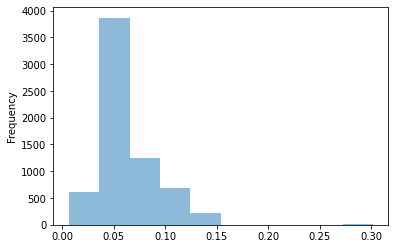

In [10]:
data['Percent of Total'].plot.hist(alpha=0.5)

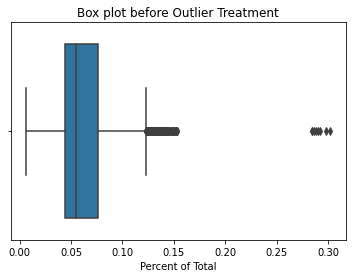

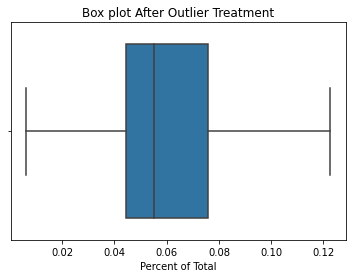

In [11]:
sns.boxplot(data['Percent of Total'])
plt.title('Box plot before Outlier Treatment')
plt.show()
for i in data['Percent of Total']:
  q1 = data['Percent of Total'].quantile(0.25)
  q3 = data['Percent of Total'].quantile(0.75)
  iqr = q3 - q1
  lwr_bound = q1 - 1.5 * iqr
  upr_bound = q3 + 1.5 * iqr
  if i > upr_bound :
    data['Percent of Total'] = data['Percent of Total'].replace(i, 0.0757) 
  elif i < lwr_bound:
    data['Percent of Total'] = data['Percent of Total'].replace(i, 0.0444)
sns.boxplot(data['Percent of Total'])
plt.title('Box plot After Outlier Treatment')
plt.show()

Text(0.5, 1.0, 'Scattter plot between Number of Households and Percent of Total')

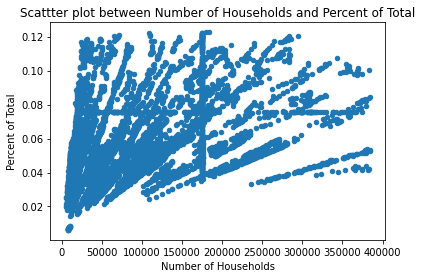

In [41]:
data.plot.scatter(x="Number of Households", y="Percent of Total", )
plt.title('Scattter plot between Number of Households and Percent of Total')

Text(0.5, 1.0, 'Distribution plot of each column')

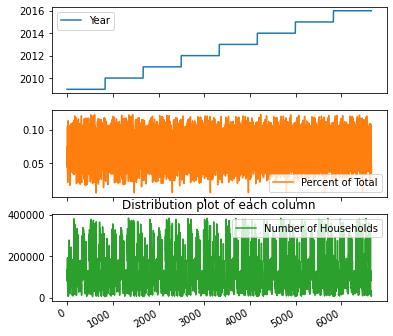

In [43]:
data.plot(subplots=True, figsize=(6, 6))
plt.title('Distribution plot of each column')

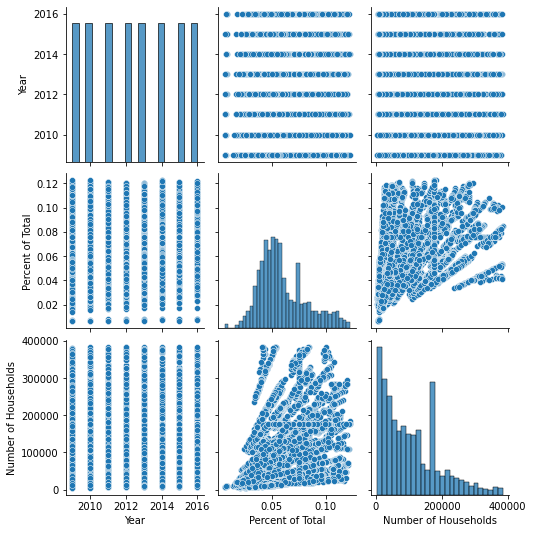

In [14]:
sns.pairplot(data)

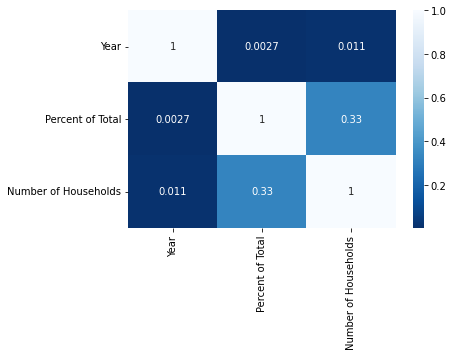

<Figure size 720x1440 with 0 Axes>

In [15]:
sns.heatmap(data.corr(), annot=True, cmap='Blues_r')
plt.figure(figsize=(10,20))
plt.show()

In [16]:
#Checking missing values in the data
data.isna().sum()

Year                    0
State                   0
Income Level            0
Percent of Total        0
Number of Households    0
dtype: int64

## Identify Input and Target columns

In [17]:
X = data.drop(columns=['Percent of Total'])
y = data['Percent of Total']

In [18]:
print(X.shape)
print(y.shape)

(6656, 4)
(6656,)


## Separating Numeric and Categorical columns

In [19]:
numeric_cols = X.select_dtypes(include=np.number).columns.tolist() #lists all the numeric columns.
categoric_cols = X.select_dtypes(include='object').columns.tolist() #lists all the categorical columns.

In [20]:
print(numeric_cols)

['Year', 'Number of Households']


In [21]:
print(categoric_cols)

['State', 'Income Level']


## Scaling Numeric columns(Data Normalization)

- Scaling your variables to make them equivalent, and thus your ML model performance would not be impacted by an underlying bias towards the larger variables.

In [22]:
X[numeric_cols].describe().loc[['min', 'max']]

,Year,Number of Households
min,2009.0,5137.0
max,2016.0,384375.0


In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(data[numeric_cols])
X[numeric_cols] = scaler.transform(X[numeric_cols])

In [24]:
X[numeric_cols].describe().loc[['min', 'max']]

,Year,Number of Households
min,0.0,0.0
max,1.0,1.0


## Encoding Caategorical Columns

In [25]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(data[categoric_cols])
encoded_cols = list(encoder.get_feature_names(categoric_cols))
X[encoded_cols] = encoder.transform(X[categoric_cols])

In [26]:
X = X[numeric_cols + encoded_cols]

In [27]:
print(X.shape)

(6656, 70)


## Splitting the data into Train and Test

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [29]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5324, 70)
(1332, 70)
(5324,)
(1332,)


## Model Building and Prediction

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [31]:
models = []
models.append(('Linear Regression', LinearRegression()))
models.append(('DecisionTreeRegression', DecisionTreeRegressor()))
models.append(('RandomForestRegressor',RandomForestRegressor()))
models.append(('Ridge Regression', Ridge(alpha=0.1)))
models.append(('Gradient Boosting',XGBRegressor()))

In [34]:
model_names = []
model_rmse = []
model_score = []
for name,model in models:
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    model_names.append(name)
    model_rmse.append(np.sqrt(mean_squared_error(predictions, y_test)))
    model_score.append(r2_score(predictions, y_test))

[17:00:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [37]:
report = pd.DataFrame({'Models':model_names, 'RMSE':model_rmse, 'Corr_Coeff':model_score})
report

,Models,RMSE,Corr_Coeff
0,Linear Regression,0.012629,0.553993
1,DecisionTreeRegression,0.003997,0.967204
2,RandomForestRegressor,0.003098,0.979543
3,Ridge Regression,0.012628,0.553592
4,Gradient Boosting,0.010661,0.650266
